In [1]:
from sklearn.datasets import make_blobs
import numpy as np

import torch
import torch.nn as nn
import torchvision

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

from tqdm import tqdm

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
X, y = make_blobs(500,5,3)
X = torch.from_numpy(X).float().to(device)
y = torch.from_numpy(y).long().to(device)

In [4]:
trainset = torch.utils.data.TensorDataset(X,y)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=50, shuffle=True)

In [5]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.L1 = nn.Linear(5,4, bias=True)
        torch.nn.init.zeros_(self.L1.weight)
        self.L2 = nn.Linear(4,3, bias=True)
        torch.nn.init.zeros_(self.L2.weight)
#         self.L2 = nn.Linear(10,5)

    def forward(self,x):
        x = self.L1(x)
        x = self.L2(x)
        return x

In [6]:
model = Model()
model.to(device)

Model(
  (L1): Linear(in_features=5, out_features=4, bias=True)
  (L2): Linear(in_features=4, out_features=3, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [8]:
rows = ['Layer {}'.format(row) for row in range(1,3)]

100%|██████████| 10/10 [00:00<00:00, 23.15it/s]


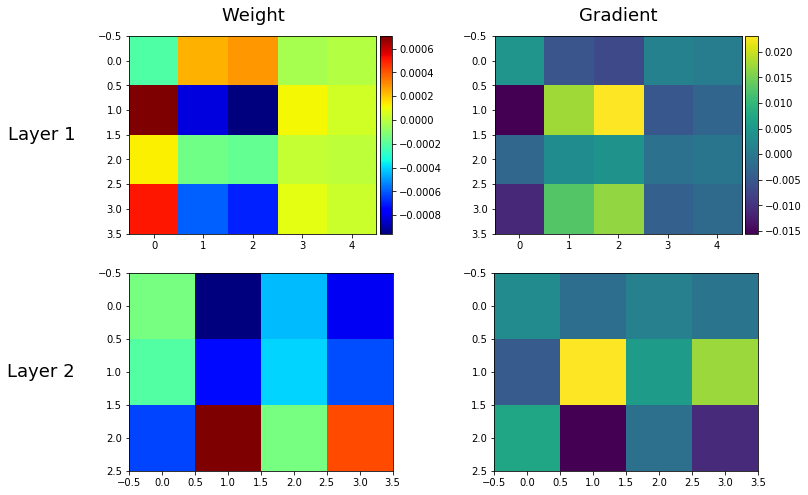

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
loss_train = []
ims = []

for e in tqdm(range(10)):
    loss_train_e = 0.0
    for x_batch, y_batch in trainloader:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss_train_e += loss.item()
        loss.backward()
        optimizer.step()
        im1 = ax[0,0].imshow(model.L1.weight.cpu().detach(), cmap='jet')
        im2 = ax[0,1].imshow(model.L1.weight.grad.cpu().detach())
        im3 = ax[1,0].imshow(model.L2.weight.cpu().detach(), cmap='jet')
        im4 = ax[1,1].imshow(model.L2.weight.grad.cpu().detach())
        ims.append([im1,im2,im3,im4])
    loss_train.append(loss_train_e)
divider1 = make_axes_locatable(ax[0,0])
divider2 = make_axes_locatable(ax[0,1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, ax=ax[0,0], cax=cax1)
fig.colorbar(im2, ax=ax[0,1], cax=cax2)   

pad = 15
# Annotating columns
ax[0,0].annotate('Weight', xy=(0.5,1), xytext=(0,pad),
               xycoords='axes fraction', textcoords='offset points',
               size='large', ha='center', va='baseline', fontsize=18)

ax[0,1].annotate('Gradient', xy=(0.5,1), xytext=(0,pad),
               xycoords='axes fraction', textcoords='offset points',
               size='large', ha='center', va='baseline', fontsize=18)
     
# Annotating rows

for idx, row in enumerate(rows):
    ax[idx,0].annotate(row, xy=(0,0.5), xytext=(-ax[idx,0].yaxis.labelpad - pad,0),
                      xycoords=ax[idx,0].yaxis.label, textcoords='offset points',
                      size='large', ha='right', va='center', fontsize=18)

In [10]:
ani = animation.ArtistAnimation(fig, ims, interval=150, blit=True,
                                repeat_delay=1000)

In [11]:
HTML(ani.to_html5_video())

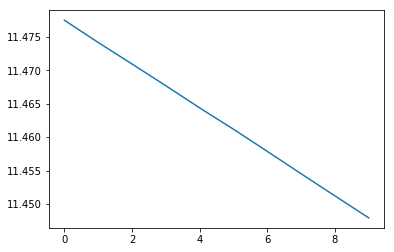

In [12]:
plt.plot(loss_train)